In [285]:
#Εισαγωγή Εργαλείων και Βιβλιοθηκών
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv 
import scipy as sp
from scipy import signal
from scipy import misc
from tabulate import tabulate

## 1.1.1

In [2]:
#Ανάγνωση της εικόνας
img = cv.imread('edgetest_22.png', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

print(type(img))
print("Resolution: ", img.shape)
print("Range: %d - %d " % (img.min(), img.max()))

<class 'numpy.ndarray'>
Resolution:  (512, 512)
Range: 0 - 1 


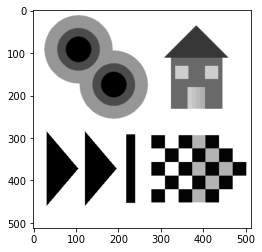

In [3]:
plt.imshow(img,cmap='gray')

## 1.1.2

In [4]:
#Ορισμός Συνάρτησης Για Υπολογισμό σ στο ανάλογο PSNR#
def sigma_calc(PSNR,img):
    Imax = np.max(img)
    Imin = np.min(img)
    temp = np.power(10,PSNR/20)
    sigma = (Imax-Imin)/(temp)
    return sigma

In [5]:

sigma_1=sigma_calc(20,img)
print(sigma_1)
sigma_2=sigma_calc(10,img)
print(sigma_2)

0.1
0.31622776601683794


In [6]:
#Εισαγωγή Θορύβου των 2 PSNR στην εικόνα
noise1=np.random.normal(0,sigma_1, size=(512, 512))
img1=img+noise1
noise2=np.random.normal(0,sigma_2, size=(512, 512))
img2=img+noise2

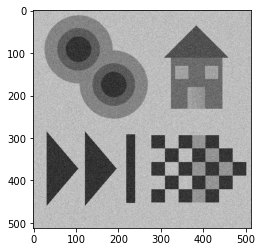

In [7]:
plt.imshow(img1,cmap='gray')

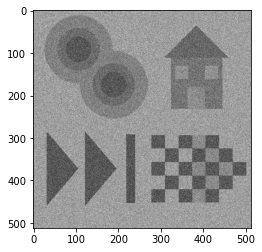

In [8]:
plt.imshow(img2,cmap='gray')

## 1.2.1

In [9]:
#Υπολογισμός 2D Gaussian από 1D kernel
sigma=1.5
n=int(np.ceil(3*sigma)*2+1)
ker=cv.getGaussianKernel(n,sigma)
gauss2D= ker @ ker.T


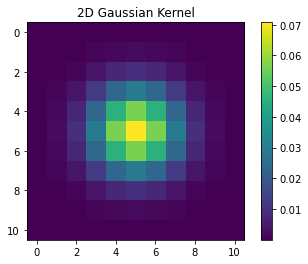

In [10]:

plt.imshow(gauss2D)
plt.title("2D Gaussian Kernel")
plt.colorbar()

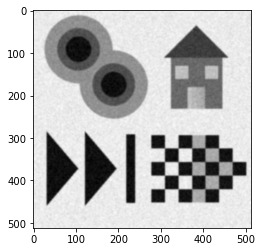

In [11]:
#Φιλτράρισμα Εικόνων με το 2D Gaussian Filter
I_20 = cv.filter2D(img1, -1, gauss2D)
plt.imshow(I_20,cmap='gray')

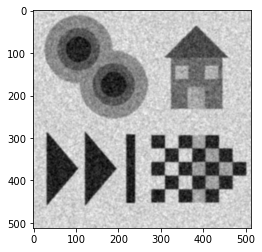

In [12]:
I_10 = cv.filter2D(img2, -1, gauss2D)
plt.imshow(I_10,cmap='gray')

In [13]:
#Ορισμός συνάρτησης για δημιουργία 2D Gaussian φιλτρου και Laplacian of Gaussian
def filters_maker(sigma):
    #Υπολογισμός 2D Gaussian
    n = int(np.ceil(3*sigma)*2+1)
    ker = cv.getGaussianKernel(n,sigma)
    gauss2D = ker @ ker.T
    #Υπολογισμός LoG από τον αναλυτικό τύπο
    x = np.linspace(-(n-1)//2,(n-1)//2,n)
    y = np.linspace(-(n-1)//2,(n-1)//2,n)
    lx, ly = np.meshgrid(x,y, indexing="xy")
    LoG = ((lx**2+ly**2-2*(sigma**2))/(2*np.pi*(sigma**6)))*np.exp(-(lx**2+ly**2)/(2*(sigma**2)))
    return gauss2D, LoG

In [14]:
x=np.linspace(-(n-1)//2,(n-1)//2,n)
y=np.linspace(-(n-1)//2,(n-1)//2,n)
lx, ly = np.meshgrid(x,y, indexing="xy")
LoG=((lx**2+ly**2-2*(sigma**2))/(2*np.pi*(sigma**6)))*np.exp(-(lx**2+ly**2)/(2*(sigma**2)))
print(LoG)

[[ 9.50144657e-06  5.63196779e-05  2.15654492e-04  5.44066518e-04
   9.29938077e-04  1.10733574e-03  9.29938077e-04  5.44066518e-04
   2.15654492e-04  5.63196779e-05  9.50144657e-06]
 [ 5.63196779e-05  3.13537113e-04  1.10733574e-03  2.54335263e-03
   3.99497943e-03  4.58999550e-03  3.99497943e-03  2.54335263e-03
   1.10733574e-03  3.13537113e-04  5.63196779e-05]
 [ 2.15654492e-04  1.10733574e-03  3.45484381e-03  6.60789297e-03
   8.32791758e-03  8.50934491e-03  8.32791758e-03  6.60789297e-03
   3.45484381e-03  1.10733574e-03  2.15654492e-04]
 [ 5.44066518e-04  2.54335263e-03  6.60789297e-03  8.26535560e-03
   2.29981635e-03 -2.87212305e-03  2.29981635e-03  8.26535560e-03
   6.60789297e-03  2.54335263e-03  5.44066518e-04]
 [ 9.29938077e-04  3.99497943e-03  8.32791758e-03  2.29981635e-03
  -2.23971530e-02 -3.91589228e-02 -2.23971530e-02  2.29981635e-03
   8.32791758e-03  3.99497943e-03  9.29938077e-04]
 [ 1.10733574e-03  4.58999550e-03  8.50934491e-03 -2.87212305e-03
  -3.91589228e-02 -

<function matplotlib.pyplot.show(close=None, block=None)>

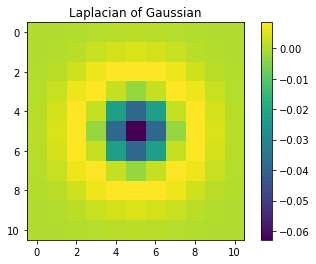

In [15]:
plt.imshow(LoG)
plt.colorbar()
plt.title("Laplacian of Gaussian")
plt.show

## 1.2.2

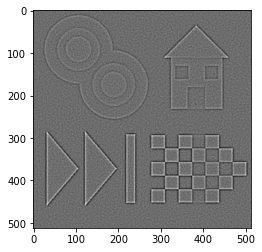

In [16]:
#Φιλτράρισμα με LoG
L1_20 = cv.filter2D(img1, -1, LoG)  # 20 PSNR
plt.imshow(L1_20,cmap='gray')

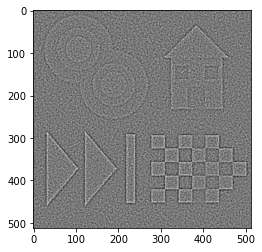

In [17]:
L1_10 = cv.filter2D(img2, -1, LoG)  # 10 PSNR
plt.imshow(L1_10,cmap='gray')

In [18]:
#Ορισμός Δίσκου για χρήση στις διαδικασίες Dilate και Erosion 
B = np.array([
    [0,1,0],
    [1,1,1],
    [0,1,0]
], dtype=np.uint8)
print(B)

[[0 1 0]
 [1 1 1]
 [0 1 0]]


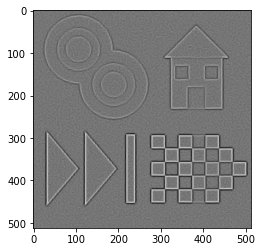

In [19]:
#Υπολογισμός Μη-Γραμμικής Προσέγγισης της Laplacian με μορφολογικά φίλτρα για τις δύο εικόνες
L2_20 = cv.dilate(I_20,B) + cv.erode(I_20, B) -2*I_20
plt.imshow(L2_20,cmap='gray')

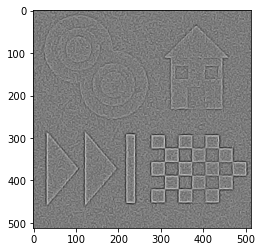

In [20]:
L2_10 = cv.dilate(I_10,B) + cv.erode(I_10, B) -2*I_10
plt.imshow(L2_10,cmap='gray')

## 1.2.3

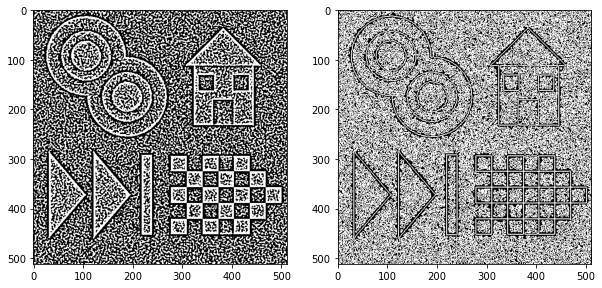

In [21]:
#Δημιουργία δυαδικών εικόνων
fig, ax = plt.subplots(1, 2, figsize = (10,40))

_, X1_20 = cv.threshold(L1_20, 0, 1, cv.THRESH_BINARY)
ax[0].imshow(X1_20,cmap='gray')

#Εφαρμογή συν΄θήκης για εύρεση του περιγράμματος
Y1_20 = cv.dilate(X1_20,B) - cv.erode(X1_20, B)
ax[1].imshow(Y1_20, cmap='gray')

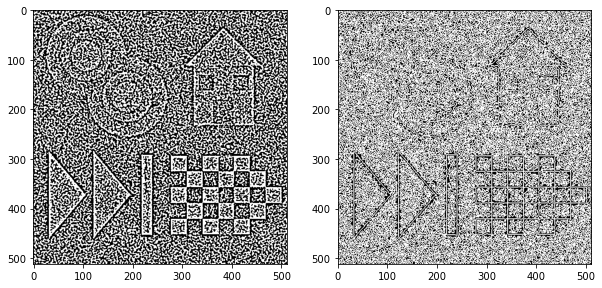

In [22]:
fig, ax = plt.subplots(1, 2, figsize = (10,40))

_, X1_10 = cv.threshold(L1_10, 0, 1, cv.THRESH_BINARY)
ax[0].imshow(X1_10,cmap='gray')

Y1_10 = cv.dilate(X1_10,B) - cv.erode(X1_10, B)
ax[1].imshow(Y1_10, cmap='gray')

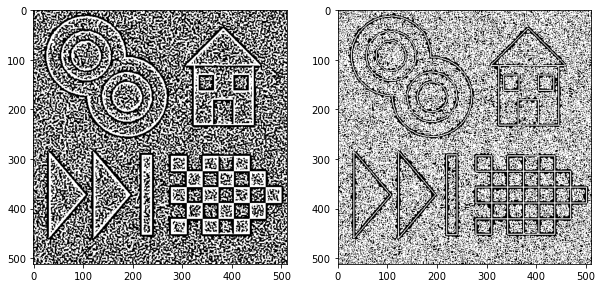

In [23]:
fig, ax = plt.subplots(1, 2, figsize = (10,40))

_, X2_20 = cv.threshold(L2_20, 0, 1, cv.THRESH_BINARY)
ax[0].imshow(X2_20,cmap='gray')

Y2_20 = cv.dilate(X2_20,B) - cv.erode(X2_20, B)
ax[1].imshow(Y2_20, cmap='gray')

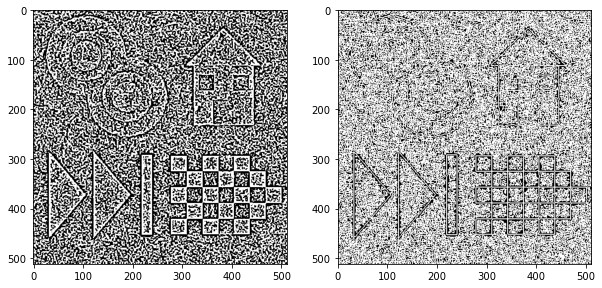

In [24]:
fig, ax = plt.subplots(1, 2, figsize = (10,40))

_, X2_10 = cv.threshold(L2_10, 0, 1, cv.THRESH_BINARY)
ax[0].imshow(X2_10,cmap='gray')

Y2_10 = cv.dilate(X2_10,B) - cv.erode(X2_10, B)
ax[1].imshow(Y2_10, cmap='gray')

## 1.2.4

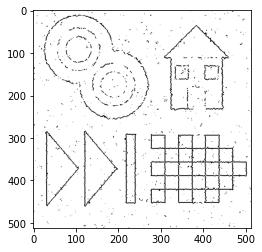

In [25]:
#Υπολογισμός παραγώγου και νόρμας για επιλογή κατάλληλων ακμών
I_10_grad = np.gradient(I_10)
I_10_grad_norm = np.sqrt(np.power(I_10_grad[0], 2) + np.power(I_10_grad[1], 2))

I_10_grad_norm_max = np.max(I_10_grad_norm)

theta_edge = 0.25
temp = np.logical_and((Y1_10 == 1.), (I_10_grad_norm > theta_edge*I_10_grad_norm_max))
#print(temp)
final = np.multiply(Y1_10, temp)
plt.imshow(final, cmap='gray_r')
#final.shape

In [26]:
#Εμφώλευση της παραπάνω διαδικασίας σε συνάρτηση 
def Edge_Detect(image, sigma=1.5, theta_edge=0.2, linear=False):
    #img = cv.imread(image, cv.IMREAD_GRAYSCALE)
    img = image.astype(float)/255
    
    # 1.2.1
    gauss2D, LoG = filters_maker(sigma)
    img_smooth = cv.filter2D(img, -1, gauss2D)
    
    # 1.2.2
    B = np.array([
            [0,1,0],
            [1,1,1],
            [0,1,0]
        ], dtype=np.uint8)
    
    if linear:
        L = cv.filter2D(img, -1, LoG)
    else:
        L = cv.dilate(img_smooth,B) + cv.erode(img_smooth, B) -2*img_smooth
        
    #1.2.3
    _, X = cv.threshold(L, 0, 1, cv.THRESH_BINARY)
    Y = cv.dilate(X,B) - cv.erode(X, B)
    
    #1.2.4
    img_grad = np.gradient(img_smooth)
    img_grad_norm = np.sqrt(np.power(img_grad[0], 2) + np.power(img_grad[1], 2))

    img_grad_norm_max = np.max(img_grad_norm)
    temp = np.logical_and((Y == 1.), (img_grad_norm > theta_edge*img_grad_norm_max))
    D = np.multiply(Y, temp)
    
    return D

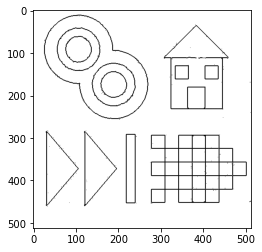

In [27]:
temp = Edge_Detect(img1, sigma=1.5, theta_edge=0.13, linear=False)
plt.imshow(temp, cmap='gray_r')

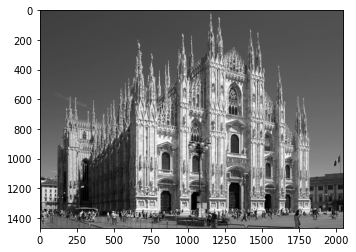

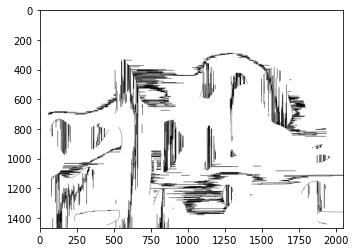

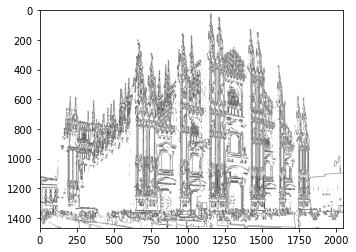

In [28]:
# Testing

img = cv.imread('duomo_edges.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255
plt.imshow(img, cmap='gray')
plt.figure();
temp = Edge_Detect(img, sigma=100, theta_edge=0.2, linear=False)
plt.imshow(temp, cmap='gray_r')
plt.figure();
temp = Edge_Detect(img, sigma=1.2, theta_edge=0.2, linear=True)
plt.imshow(temp, cmap='gray_r')

## 1.3.1

In [29]:
img = cv.imread('edgetest_22.png', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

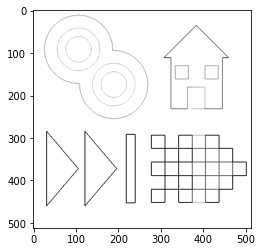

In [30]:
#Υπολογισμός "αληθινών ακμών"
B = np.array([
        [0,1,0],
        [1,1,1],
        [0,1,0]
    ], dtype=np.uint8)

M = cv.dilate(img, B) - cv.erode(img, B)

theta_real_edge = 0.2
T = np.multiply(M, M > theta_real_edge)

plt.imshow(T, cmap='gray_r')

## 1.3.2

In [31]:
#Συνάρτηση μετρικής αξιολόγησης 
def evaluation(img, D, theta_real_edge=0.2):
    
    B = np.array([
            [0,1,0],
            [1,1,1],
            [0,1,0]
        ], dtype=np.uint8)

    M = cv.dilate(img, B) - cv.erode(img, B)
    T = np.multiply(M, M > theta_real_edge)

    precision = np.multiply(T, D).sum() / D.sum()
    recall = np.multiply(T, D).sum() / T.sum()
    C = (precision + recall) / 2
    return C

In [32]:
img = cv.imread('edgetest_22.png', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

sigma_3=sigma_calc(5,img)
noise3=np.random.normal(0,sigma_3, size=(512, 512))
img3=img+noise3

print(img.shape)
temp = Edge_Detect(img, sigma=1.2, theta_edge=0.2, linear=False)

evaluation(img, temp)

(512, 512)


0.8250935568814665

## 1.3.3

In [33]:
#Σύγκριση Γραμμικών και Μη-Γραμμικών Μεθόδων για διαφορετικά PSNR
img = cv.imread('edgetest_22.png', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

sigma_temp=sigma_calc(20,img)
noise_temp=np.random.normal(0,sigma_temp, size=img.shape)
img_noisy=img+noise_temp

D_20_nonlinear = Edge_Detect(img_noisy, sigma=1.3, theta_edge=0.35, linear=False)
D_20_linear = Edge_Detect(img_noisy, sigma=1.3, theta_edge=0.35, linear=True)

eval_20_nonlinear = evaluation(img, D_20_nonlinear)
eval_20_linear = evaluation(img, D_20_linear)

In [34]:
sigma_temp=sigma_calc(15,img)
noise_temp=np.random.normal(0,sigma_temp, size=img.shape)
img_noisy=img+noise_temp

D_15_nonlinear = Edge_Detect(img_noisy, sigma=1.6, theta_edge=0.4, linear=False)
D_15_linear = Edge_Detect(img_noisy, sigma=1.6, theta_edge=0.4, linear=True)

eval_15_nonlinear = evaluation(img, D_15_nonlinear)
eval_15_linear = evaluation(img, D_15_linear)

In [35]:
sigma_temp=sigma_calc(10,img)
noise_temp=np.random.normal(0,sigma_temp, size=img.shape)
img_noisy=img+noise_temp

D_10_nonlinear = Edge_Detect(img_noisy, sigma=1.7, theta_edge=0.45, linear=False)
D_10_linear = Edge_Detect(img_noisy, sigma=1.7, theta_edge=0.45, linear=True)

eval_10_nonlinear = evaluation(img, D_10_nonlinear)
eval_10_linear = evaluation(img, D_10_linear)

In [36]:
#Παρουσίαση Αποτελεσμάτων Αξιολόγησης
evaluations = [["PSNR=20dB, σ=1.3, θ=0.35, linear approach", eval_20_linear],
              ["PSNR=20dB, σ=1.3, θ=0.35, non-linear approach", eval_20_nonlinear],
              ["PSNR=15dB, σ=1.6, θ=0.4, linear approach", eval_15_linear],
              ["PSNR=15dB, σ=1.6, θ=0.4, non-linear approach", eval_15_nonlinear],
              ["PSNR=10dB, σ=1.7, θ=0.45, linear approach", eval_10_linear],
              ["PSNR=10dB, σ=1.7, θ=0.45, non-linear approach", eval_10_nonlinear]]

print(tabulate(evaluations, headers=["Parameters", "C-evaluation"], tablefmt="grid"))

+-----------------------------------------------+----------------+
| Parameters                                    |   C-evaluation |
+===============================================+================+
| PSNR=20dB, σ=1.3, θ=0.35, linear approach     |       0.852522 |
+-----------------------------------------------+----------------+
| PSNR=20dB, σ=1.3, θ=0.35, non-linear approach |       0.85468  |
+-----------------------------------------------+----------------+
| PSNR=15dB, σ=1.6, θ=0.4, linear approach      |       0.840079 |
+-----------------------------------------------+----------------+
| PSNR=15dB, σ=1.6, θ=0.4, non-linear approach  |       0.847212 |
+-----------------------------------------------+----------------+
| PSNR=10dB, σ=1.7, θ=0.45, linear approach     |       0.77184  |
+-----------------------------------------------+----------------+
| PSNR=10dB, σ=1.7, θ=0.45, non-linear approach |       0.811145 |
+-----------------------------------------------+-------------

## 1.4.1

Evaluation score: 0.483880145531011


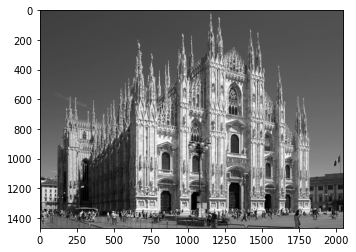

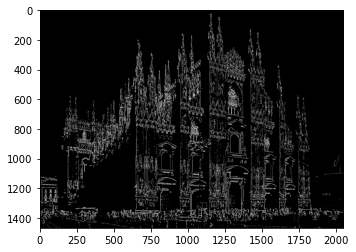

In [37]:
#Εφαρμογή Μεθόδου στην εικόνα Edge Detect
#Δοκιμές για διαφορετικές τιμές σ και θedge
img = cv.imread('duomo_edges.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

plt.imshow(img, cmap='gray')
plt.figure()

D = Edge_Detect(img, sigma=0.03, theta_edge=0.3, linear=False)
plt.imshow(D, cmap='gray')

print(f"Evaluation score: {evaluation(img, D)}")

Evaluation score: 0.4967734907518523


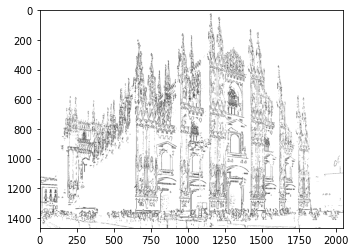

In [38]:
#
D = Edge_Detect(img, sigma=0.5, theta_edge=0.3, linear=False)
plt.imshow(D, cmap='gray_r')

print(f"Evaluation score: {evaluation(img, D)}")

Evaluation score: 0.4230163929727292


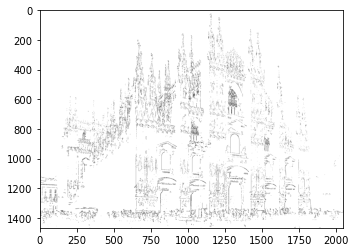

In [39]:
D = Edge_Detect(img, sigma=0.2, theta_edge=0.4, linear=False)
plt.imshow(D, cmap='gray_r')

print(f"Evaluation score: {evaluation(img, D)}")

Evaluation score: 0.6202545204589409


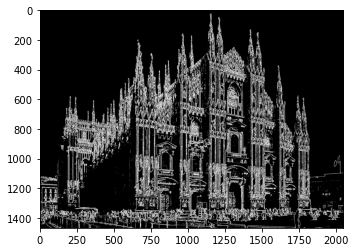

In [40]:
#Η βέλτιστη ανίχνευση ακμών με το καλύτερο evalutation score
D = Edge_Detect(img, sigma=0.03, theta_edge=0.15, linear=False)
plt.imshow(D, cmap='gray')

print(f"Evaluation score: {evaluation(img, D)}")

## Μέρος 2ο

## 2.1

In [41]:
from cv22_lab1_part2_utils import * 

In [199]:
#Συνολική Συνάρτηση των μεθόδων που θα παρουσιαστούν παρακάτω
def Corner_Detect(img, sigma, r, theta_corn):
    gauss2D_diff, _ = filters_maker(sigma)
    gauss2D_int , _ = filters_maker(r)

    img_smooth = cv.filter2D(img, -1, gauss2D_diff)

    img_smooth_grad = np.gradient(img_smooth)

    Jconv_1 = np.multiply(img_smooth_grad[0],img_smooth_grad[0])

    Jconv_2 = np.multiply(img_smooth_grad[0],img_smooth_grad[1])

    Jconv_3 = np.multiply(img_smooth_grad[1],img_smooth_grad[1])


    J1 = cv.filter2D(Jconv_1,-1, gauss2D_int)

    J2 = cv.filter2D(Jconv_2,-1, gauss2D_int)

    J3 = cv.filter2D(Jconv_3,-1, gauss2D_int)
    
    lambda_plus = 0.5*(J1 + J3 + np.sqrt(np.power(J1-J3,2)+4*np.power(J2,2)))
    lambda_minus = 0.5*(J1 + J3 - np.sqrt(np.power(J1-J3,2)+4*np.power(J2,2)))
    
    R = lambda_minus*lambda_plus - k * np.power(lambda_minus+lambda_plus,2)
    
    ns = np.ceil(3*sigma)*2+1
    B_sq = disk_strel(ns)
    Cond1 = ( R==cv.dilate(R,B_sq) )

    R_max = np.max(R)

    Cond2 = ( R > theta_corn * R_max)

    Condition = np.logical_and(Cond1, Cond2)

    coordinates0, coordinates1 = np.where(Condition)

    Cond_final = Condition * R
    
    coordinates0 = np.expand_dims(coordinates0,-1).astype(float)
    coordinates1 = np.expand_dims(coordinates1,-1).astype(float)
    
    
    Kp_Data = np.vstack([coordinates1.T,coordinates0.T,np.full_like(coordinates0.T,sigma)])
    
    return Kp_Data.T

In [43]:
#Ορισμός Μεταβλητών και υπολογίσμος J στοχείων του τανυστή
sigma=2.5
r=2.5
k=0.05
theta_corn=0.002
s=1.5
N=4

img = cv.imread('duomo_edges.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

print(type(img))
print("Resolution: ", img.shape)
print("Range: %d - %d " % (img.min(), img.max()))

gauss2D_diff, _ = filters_maker(sigma)
gauss2D_int , _ = filters_maker(r)

img_smooth = cv.filter2D(img, -1, gauss2D_diff)

img_smooth_grad = np.gradient(img_smooth)

Jconv_1 = np.multiply(img_smooth_grad[0],img_smooth_grad[0])

Jconv_2 = np.multiply(img_smooth_grad[0],img_smooth_grad[1])

Jconv_3 = np.multiply(img_smooth_grad[1],img_smooth_grad[1])




J1 = cv.filter2D(Jconv_1,-1, gauss2D_int)

J2 = cv.filter2D(Jconv_2,-1, gauss2D_int)

J3 = cv.filter2D(Jconv_3,-1, gauss2D_int)

<class 'numpy.ndarray'>
Resolution:  (1467, 2048)
Range: 0 - 1 


In [44]:
#Υπολογισμός Ιδιοτιμών και Παρουσίαση τους
lambda_plus = 0.5*(J1 + J3 + np.sqrt(np.power(J1-J3,2)+4*np.power(J2,2)))
lambda_minus = 0.5*(J1 + J3 - np.sqrt(np.power(J1-J3,2)+4*np.power(J2,2)))

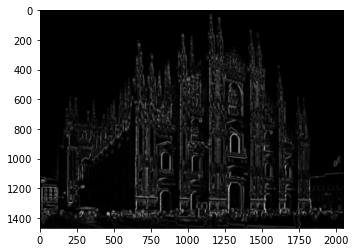

In [45]:
plt.imshow(lambda_plus, cmap = 'gray')

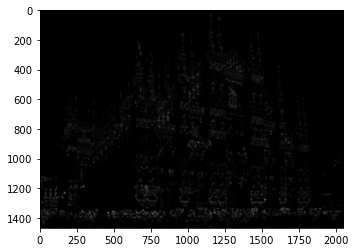

In [46]:
plt.imshow(lambda_minus, cmap = 'gray')

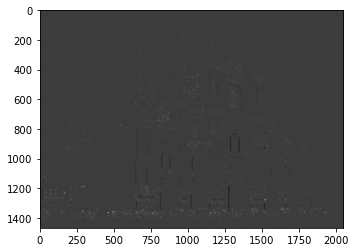

In [47]:
#Υπολογισμός κριτηρίου γωνιότητας
R = lambda_minus*lambda_plus - k * np.power(lambda_minus+lambda_plus,2)
plt.imshow(R , cmap = 'gray')

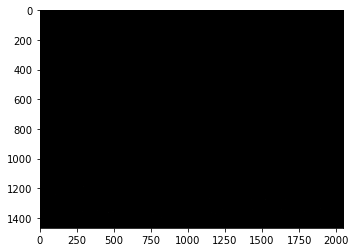

In [48]:
#Εφαρμογή των δύο συνθηκών Σ1 και Σ2 πάνω στο κριτήριο γωνιότητας
ns = np.ceil(3*sigma)*2+1
B_sq = disk_strel(ns)
Cond1 = ( R==cv.dilate(R,B_sq) )


R_max = np.max(R)

Cond2 = ( R > theta_corn * R_max)

Cond = np.logical_and(Cond1, Cond2)

coordinates0, coordinates1 = np.where(Cond)

Cond_final = Cond * R
plt.imshow(Cond_final , cmap = 'gray')

In [49]:
#Επέκταση των διαστάσεων για υπολογισμό του πίνακα Νx3
coordinates0 = np.expand_dims(coordinates0,-1).astype(float)
coordinates1 = np.expand_dims(coordinates1,-1).astype(float)

In [50]:
Kp_Data = np.vstack([coordinates1.T,coordinates0.T,np.full_like(coordinates0.T,sigma)])

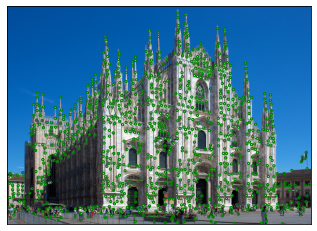

In [51]:
#Εφαρμογή των αποτελεσμάτων στην δοσμένη συνάρτηση
img = cv.imread('duomo_edges.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax = interest_points_visualization(img, Kp_Data.T)

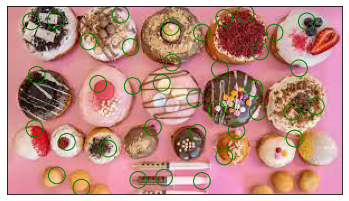

In [52]:
img = cv.imread('donuts.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img1 = img1.astype(float)/255
ax = interest_points_visualization(img, Corner_Detect(img1,sigma,r,theta_corn))

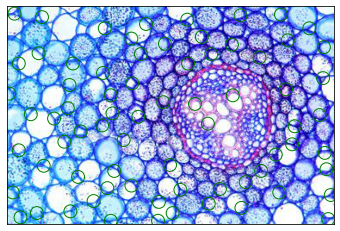

In [53]:
img = cv.imread('cells.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img1 = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
img1 = img1.astype(float)/255
ax = interest_points_visualization(img, Corner_Detect(img1,sigma,r,theta_corn))

## 2.2

In [54]:
#Πολυκλιμακωτή προσέγγιση της παραπάνω διαδικασίας
img = cv.imread('donuts.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

sigma=2.5
r=2.5
k=0.05
theta_corn=0.002
s=1.5
N=4
#Ορισμός κλιμάκων διαφόρισης και ολοκλήρωσης
diff_scale = [np.power(s,i)*sigma for i in range(0,N)]
int_scale = [np.power(s,i)*r for i in range(0,N)]


In [55]:
#Υπολογισμός κανονικοποιημένης Laplacian of Gaussian για κάθε κλίμακα διαφόρισης
LoG = []

for i in range(N):
    gauss2D, _ = filters_maker(diff_scale[i])
    img_smooth = cv.filter2D(img, -1, gauss2D)
    Lxx = np.gradient(np.gradient(img_smooth)[0])[0]
    Lyy = np.gradient(np.gradient(img_smooth)[1])[1]
    LoG.append((diff_scale[i]**2)*(np.abs(Lxx+Lyy)))
    
print(LoG[0].shape)

(168, 300)


In [56]:
#Εφαρμογή της συνθήκης στα αποτελέσματα της μονοκλιμακω΄της προσέγγισης
corner_points = []
for i in range(N):
    corner_points.append(Corner_Detect(img,diff_scale[i],int_scale[i],theta_corn))
    
#Dummy σημείο για ορισμό του πίνακα
final_points = np.array([[1.,1.,1.]])

for j in range(N):
    for i in range(corner_points[j].shape[0]):
        if j==0:
            if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                final_points = np.vstack([final_points, corner_points[j][i,:]])
        elif j==N-1:
            if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                final_points = np.vstack([final_points, corner_points[j][i,:]])
        else:
            if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])] and LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                final_points = np.vstack([final_points, corner_points[j][i,:]])
                
#Αφαίρεση του πρώτου σημείου                
final_points = np.delete(final_points,0,0)

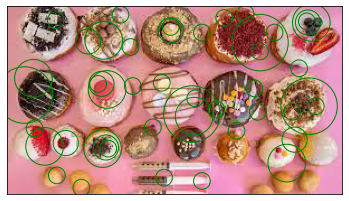

In [57]:
#Εφαρμογή στην εικόνα 
img = cv.imread('donuts.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax = interest_points_visualization(img, final_points)

In [58]:
#Εμφώλευση της διαδικασίας σε συνάρτηση
def Corner_Detect_Multiscale(img, sigma, r,s, theta_corn,N):
    
    diff_scale = [np.power(s,i)*sigma for i in range(0,N)]
    int_scale = [np.power(s,i)*r for i in range(0,N)]
    LoG = []

    for i in range(N):
        gauss2D, _ = filters_maker(diff_scale[i])
        img_smooth = cv.filter2D(img, -1, gauss2D)
        Lxx = np.gradient(np.gradient(img_smooth)[0])[0]
        Lyy = np.gradient(np.gradient(img_smooth)[1])[1]
        LoG.append((diff_scale[i]**2)*(np.abs(Lxx+Lyy)))
        
    corner_points = []
    for i in range(N):
        corner_points.append(Corner_Detect(img,diff_scale[i],int_scale[i],theta_corn))

    final_points = np.array([[1.,1.,1.]])

    for j in range(N):
        for i in range(corner_points[j].shape[0]):
            if j==0:
                if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                    final_points = np.vstack([final_points, corner_points[j][i,:]])
            elif j==N-1:
                if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                    final_points = np.vstack([final_points, corner_points[j][i,:]])
            else:
                if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])] and LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                    final_points = np.vstack([final_points, corner_points[j][i,:]])

    final_points = np.delete(final_points,0,0)
    
    return final_points

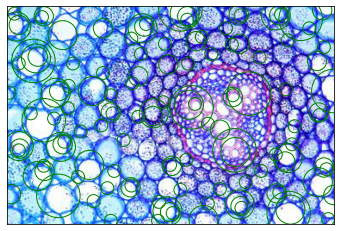

In [59]:
#Εφαρμογή στην εικόνα
img1 = cv.imread('cells.jpg', cv.IMREAD_GRAYSCALE)
img1 = img1.astype(float)/255
img = cv.imread('cells.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
a = Corner_Detect_Multiscale(img1,sigma,r,s,theta_corn,N)
ax = interest_points_visualization(img, a)

## 2.3

In [60]:
#Υπολογισμός ορίζουσας του πίνακα Hessian δεύτερων παραγώγων
img = cv.imread('cells.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255
sigma = 6
gauss2D, _ = filters_maker(sigma)
img_smooth = cv.filter2D(img, -1, gauss2D)

Lxx = np.gradient(np.gradient(img_smooth)[0])[0]
Lyy = np.gradient(np.gradient(img_smooth)[1])[1]
Lxy = np.gradient(np.gradient(img_smooth)[0])[1]

R = Lxx * Lyy - Lxy * Lxy




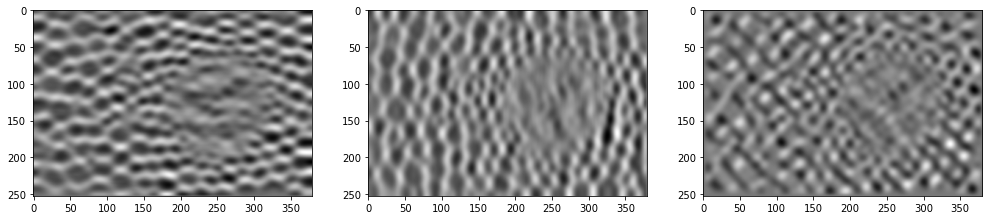

In [61]:
plt.figure( figsize = (17,17))
plt.subplot(1,3,1)
plt.imshow(Lxx , cmap = 'gray')
plt.subplot(1,3,2)
plt.imshow(Lyy , cmap = 'gray')
plt.subplot(1,3,3)
plt.imshow(Lxy , cmap = 'gray')

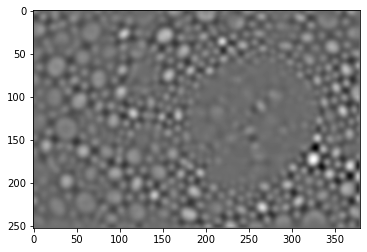

In [62]:
plt.imshow(R , cmap = 'gray')

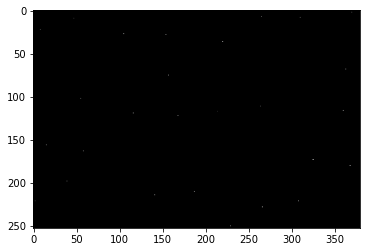

In [63]:
#Εφαρμογ΄ή συνθηκών Σ1 , Σ2
ns = np.ceil(3*sigma)*2+1
B_sq = disk_strel(ns)
Cond1 = ( R==cv.dilate(R,B_sq) )


R_max = np.max(R)

Cond2 = ( R > theta_corn * R_max)

Cond = np.logical_and(Cond1, Cond2)

coordinates0, coordinates1 = np.where(Cond)

Cond_final = Cond * R
plt.imshow(Cond_final , cmap = 'gray')

In [64]:
coordinates0 = np.expand_dims(coordinates0,-1).astype(float)
coordinates1 = np.expand_dims(coordinates1,-1).astype(float)

In [65]:
Kp_Data = np.vstack([coordinates1.T,coordinates0.T,np.full_like(coordinates0.T,sigma)])

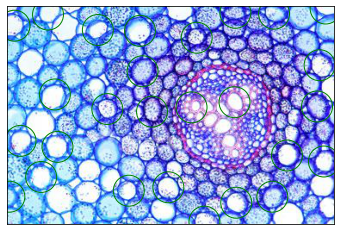

In [66]:
#Παρουσίαση αποτελέσματος ανίχνευσης blob
img = cv.imread('cells.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax = interest_points_visualization(img, Kp_Data.T)

In [67]:
#Εμφώλευση της διαδικασίας σε συνάρτηση
def Blob_Detect(img,sigma,r,theta_corn):
    gauss2D, _ = filters_maker(sigma)
    img_smooth = cv.filter2D(img, -1, gauss2D)

    Lxx = np.gradient(np.gradient(img_smooth)[0])[0]
    Lyy = np.gradient(np.gradient(img_smooth)[1])[1]
    Lxy = np.gradient(np.gradient(img_smooth)[0])[1]

    R = Lxx * Lyy - Lxy * Lxy
    ns = np.ceil(3*sigma)*2+1
    B_sq = disk_strel(ns)
    Cond1 = ( R==cv.dilate(R,B_sq) )


    R_max = np.max(R)

    Cond2 = ( R > theta_corn * R_max)

    Cond = np.logical_and(Cond1, Cond2)

    coordinates0, coordinates1 = np.where(Cond)

    Cond_final = Cond * R
    
    coordinates0 = np.expand_dims(coordinates0,-1).astype(float)
    coordinates1 = np.expand_dims(coordinates1,-1).astype(float)
    Kp_Data = np.vstack([coordinates1.T,coordinates0.T,np.full_like(coordinates0.T,sigma)])
    return Kp_Data.T

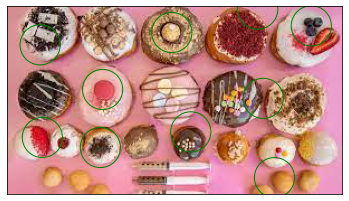

In [68]:
#Εφαρμογή της συνάρτησης στην εικόνα
img1 = cv.imread('donuts.jpg', cv.IMREAD_GRAYSCALE)
img1 = img1.astype(float)/255
img = cv.imread('donuts.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
a = Blob_Detect(img1,sigma,r,theta_corn)
ax = interest_points_visualization(img, a)

## 2.4

In [69]:
#Πολυκλιμακωτή προσέγγιση της ανίχνευσης blobs
img = cv.imread('cells.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255
sigma = 4
r = 4

#Ίδια διαδικασία με την πολυκλιμακωτή προσέγγιση γωνιών
diff_scale = [np.power(s,i)*sigma for i in range(0,N)]
int_scale = [np.power(s,i)*r for i in range(0,N)]

In [70]:
LoG = []

for i in range(N):
    gauss2D, _ = filters_maker(diff_scale[i])
    img_smooth = cv.filter2D(img, -1, gauss2D)
    Lxx = np.gradient(np.gradient(img_smooth)[0])[0]
    Lyy = np.gradient(np.gradient(img_smooth)[1])[1]
    LoG.append((diff_scale[i]**2)*(np.abs(Lxx+Lyy)))
    
print(LoG[0].shape)

(253, 380)


In [71]:

corner_points = []
for i in range(N):
    corner_points.append(Blob_Detect(img,diff_scale[i],int_scale[i],0.001))

final_points = np.array([[1.,1.,1.]])

for j in range(N):
    for i in range(corner_points[j].shape[0]):
        if j==0:
            if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                final_points = np.vstack([final_points, corner_points[j][i,:]])
        elif j==N-1:
            if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                final_points = np.vstack([final_points, corner_points[j][i,:]])
        else:
            if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])] and LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                final_points = np.vstack([final_points, corner_points[j][i,:]])
                
final_points = np.delete(final_points,0,0)

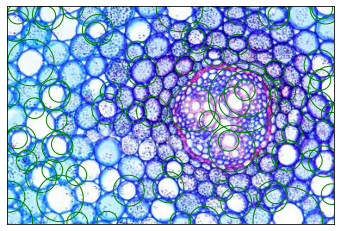

In [72]:
img = cv.imread('cells.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
ax = interest_points_visualization(img, final_points)

In [73]:
#Εμφώλευση της διαδικασίας σε συνάρτηση 
def Blob_Detect_Multiscale(img,sigma,s,r,theta_corn,N):
    diff_scale = [np.power(s,i)*sigma for i in range(0,N)]
    int_scale = [np.power(s,i)*r for i in range(0,N)]
    
    LoG = []

    for i in range(N):
        gauss2D, _ = filters_maker(diff_scale[i])
        img_smooth = cv.filter2D(img, -1, gauss2D)
        Lxx = np.gradient(np.gradient(img_smooth)[0])[0]
        Lyy = np.gradient(np.gradient(img_smooth)[1])[1]
        LoG.append((diff_scale[i]**2)*(np.abs(Lxx+Lyy)))
    
    corner_points = []
    for i in range(N):
        corner_points.append(Blob_Detect(img,diff_scale[i],int_scale[i],0.001))

    final_points = np.array([[1.,1.,1.]])

    for j in range(N):
        for i in range(corner_points[j].shape[0]):
            if j==0:
                if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                    final_points = np.vstack([final_points, corner_points[j][i,:]])
            elif j==N-1:
                if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                    final_points = np.vstack([final_points, corner_points[j][i,:]])
            else:
                if LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j+1][int(corner_points[j][i,1]), int(corner_points[j][i,0])] and LoG[j][int(corner_points[j][i,1]), int(corner_points[j][i,0])] > LoG[j-1][int(corner_points[j][i,1]), int(corner_points[j][i,0])]:
                    final_points = np.vstack([final_points, corner_points[j][i,:]])

    final_points = np.delete(final_points,0,0)
    
    return final_points

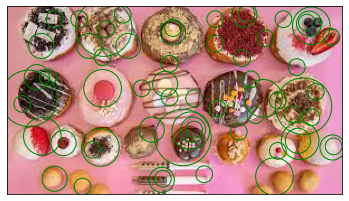

In [74]:
#Εφαρμογή της συνάρτησης στην εικόνα
img1 = cv.imread('donuts.jpg', cv.IMREAD_GRAYSCALE)
img1 = img1.astype(float)/255
img = cv.imread('donuts.jpg', cv.IMREAD_COLOR)
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
sigma=2.5
r=2.5
k=0.05
theta_corn=0.002
s=1.5
N=4

a = Blob_Detect_Multiscale(img1,sigma,s,r,theta_corn,N)
ax = interest_points_visualization(img, a)

# 2.5

## 2.5.1

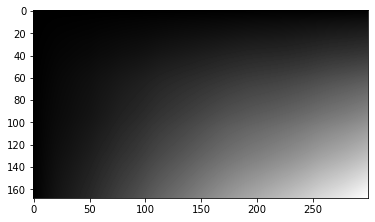

In [75]:
#Προσέγγιση ανίχνευση blob με Box Filters
img = cv.imread('donuts.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

temp = np.cumsum(img ,axis = 0)
img_int = np.cumsum(temp ,axis = 1)

plt.imshow(img_int , cmap = 'gray')

## 2.5.2

In [76]:
sigma = 1.2
ns = np.ceil(3*sigma)*2+1
#Δημιουργία συνάρτησης Box Filter
def Box_Filters(sigma):
    #Ορισμός n (διάσταση φίλτρου) και των διαστάσεων των παραθύρων
    ns = int(np.ceil(3*sigma)*2+1)
    hxx = int(4 * np.floor(ns/6) + 1)
    wxx = int(2 * np.floor(ns/6) + 1)
    
    hyy = wxx
    wyy = hxx
    
    hxy = wxx
    wxy = wxx
    
    a = np.ones((hxx,wxx))
    b = -2 * a
    
    c = a.T
    d = b.T
    
    e = np.ones((hxy,wxy))
    f = -1 * e
    
    z = np.zeros(((ns - hxx) // 2, ns))
    if ns - 3 * wxx > 0:
        Dxx = np.hstack([np.zeros((hxx,(ns-3*wxx)//2)),a,b,a,np.zeros((hxx,(ns-3*wxx)//2))])
    elif abs(ns - 3 * wxx) < 1e-4:
        Dxx = np.hstack([a,b,a])
    else:
        Dxx = np.hstack([a,b,a])
        Dxx =  Dxx[:, 1:-1]
    
    Dxx = np.vstack([z, Dxx ,z])
    
    Dyy = Dxx.T
    
    Dxy_1 = np.hstack([e , np.zeros((wxy,1)), f])
    Dxy = np.vstack([Dxy_1, np.zeros((1,2*wxy + 1)),-Dxy_1])
    Dxy = np.vstack([np.zeros(((ns-2*wxy-1) // 2,(2*wxy + 1))), Dxy,np.zeros(((ns-2*wxy-1) // 2,(2*wxy + 1)))])
    Dxy = np.hstack([np.zeros((ns,(ns-2*wxy-1) // 2)),Dxy,np.zeros((ns,(ns-2*wxy-1) // 2))])
    
    return Dxx,Dyy,Dxy

In [77]:
#Παρουσίαση αποτελεσμάτων
Dxx,Dyy,Dxy = Box_Filters(1.9)

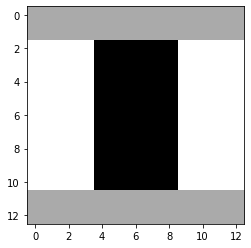

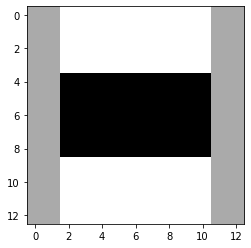

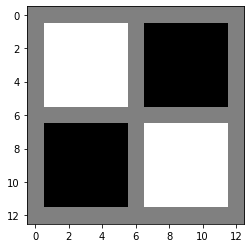

In [78]:
plt.imshow(Dxx,cmap='gray')
plt.figure()
plt.imshow(Dyy,cmap='gray')
plt.figure()
plt.imshow(Dxy,cmap='gray')

In [79]:
def window_filter (img_integ, height, width):
    #Pad της ολοκληρωτικής εικόνας με μηδενικά για σωστό shift του πίνακα 
    padded_integ = np.pad(img_integ, ((height,0), (width,0)) )
    padded_integ = np.pad(padded_integ, ((0,height), (0,width)), mode = 'edge')
    
    #Ορισμός διαστάσεων παραθύρου
    yf = int( (height+1)/2 - 1 )
    xf = int( (width +1)/2 - 1 )
    
    #Shift του πίνακα για αντίστοιχιση κάθε σημείου με το αντίστοιχο άκρο του παραθύρου
    A = np.roll( np.roll(padded_integ, -(xf+1), axis=1), -(yf+1), axis=0)
    B = np.roll( np.roll(padded_integ,      xf, axis=1), -(yf+1), axis=0)
    C = np.roll( np.roll(padded_integ,      xf, axis=1),      yf, axis=0)
    D = np.roll( np.roll(padded_integ, -(xf+1), axis=1),      yf, axis=0)
    
    #Άθροισμα σημείων
    window_sum = C + A - B - D
    return window_sum[height:,width:][:-height,:-width]

def Calculate_Laplacian_IntegImg(integral_img, sigma):
    #Υπολογισμός Διαστάσεων Φίλτρου και Παραθύρων
    ns = int (2*np.ceil(3*sigma)+1)

    Dxx_h = int ( 4*np.floor(ns/6)+1 )
    Dxx_w  = int ( 2*np.floor(ns/6)+1 )

    Dyy_h = int ( 2*np.floor(ns/6)+1 )
    Dyy_w  = int ( 4*np.floor(ns/6)+1 )

    Dxy_h = int ( 2*np.floor(ns/6)+1 )
    Dxy_w  = int ( 2*np.floor(ns/6)+1 )
    
    #Υπολογισμός αθροισμάτων για κάθε παράθυρο
    Lxx_window = window_filter(integral_img, Dxx_h, Dxx_w)
    Lyy_window = window_filter(integral_img, Dyy_h, Dyy_w)
    Lxy_window = window_filter(integral_img, Dxy_h, Dxy_w)
    
    #Pad των πινάκων για σωστό shift 
    Lxx = np.pad( Lxx_window, ((0,0), (Dxx_w,Dxx_w)), mode='reflect' )
    Lyy = np.pad( Lyy_window, ((Dyy_h,Dyy_h), (0,0)), mode='reflect' )
    Lxy = np.pad( Lxy_window, ((Dxy_h+1,Dxy_h+1),(Dxy_w+1,Dxy_w+1)), mode='reflect' )
    
    #Εφαρμογή συντελεστών στα παράθυρα και shift για άθροισμα στο κέντρικο σημείο του παραθύρου
    Lxx = -2*Lxx + np.roll(Lxx, Dxx_w,  axis=1) + np.roll(Lxx, -Dxx_w, axis=1)
    Lyy = -2*Lyy + np.roll(Lyy, Dyy_h, axis=0) + np.roll(Lyy, -Dyy_h, axis=0)
    
    #Ομοίως για τα παράθυρα του Lxy
    xf = int ( (Dxy_w  + 1)/2 - 1 )
    yf = int ( (Dxy_h + 1)/2 - 1 )
    
    
    TL  = np.roll( Lxy, [  yf+1 ,   xf+1 ], axis=(0,1) )
    TR = np.roll( Lxy, [  yf+1 , -(xf+1)], axis=(0,1) )
    BL  = np.roll( Lxy, [-(yf+1),   xf+1 ], axis=(0,1) )
    BR = np.roll( Lxy, [-(yf+1), -(xf+1)], axis=(0,1) )

    Lxy = TL + BR - TR - BL
    
    #Διαγράφη padding των πινάκων 
    Lxx = Lxx[:, Dxx_w:-Dxx_w]
    Lyy = Lyy[Dyy_h:-Dyy_h, :]
    Lxy = Lxy[ (Dxy_h+1):-(Dxy_h+1), (Dxy_w+1):-(Dxy_w+1)]

    return Lxx, Lyy, Lxy

In [80]:
%%time
Lxx, Lyy, Lxy = Calculate_Laplacian_IntegImg(img_int, 1.2)

Wall time: 6 ms


In [81]:
%%time
Dxx, Dyy, Dxy = Box_Filters(1.2)

Lxx = cv.filter2D(img,-1,Dxx)
Lyy = cv.filter2D(img,-1,Dyy)
Lxy = cv.filter2D(img,-1,Dxy)



Wall time: 4 ms


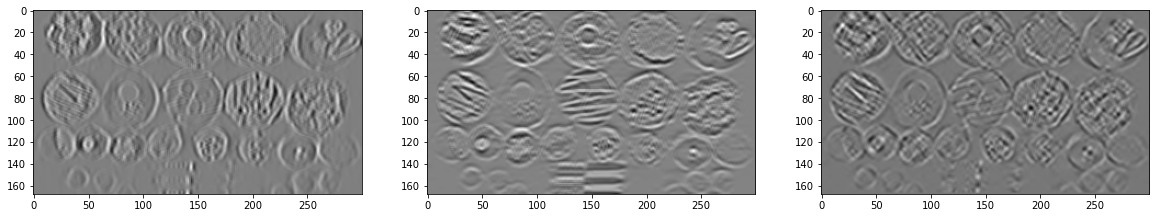

In [82]:
plt.figure( figsize = (20,20))
plt.subplot(1,3,1)
plt.imshow(Lxx, cmap='gray')
plt.subplot(1,3,2)
plt.imshow(Lyy, cmap='gray')
plt.subplot(1,3,3)
plt.imshow(Lxy, cmap='gray')

## 2.5.3

In [83]:
#Εμ΄φώλευση της διαδικασίας με την ολοκληρωτική εικόνα σε συνάρτηση 
def Blob_Detect_IntegImg(sigma, img, theta_corn):
    temp = np.cumsum(img ,axis = 0)
    img_int = np.cumsum(temp ,axis = 1)
    #img_int = cv.integral(img)
    
    ns = np.ceil(3*sigma)*2+1
    Lxx,Lyy,Lxy = Calculate_Laplacian_IntegImg(img_int, sigma)
    
    R = Lxx * Lyy - ((0.9 * Lxy)*(0.9 * Lxy))
    
    B_sq = disk_strel(ns)
    Cond1 = ( R==cv.dilate(R,B_sq) )

    R_max = np.max(R)

    Cond2 = ( R > theta_corn * R_max)

    Cond = np.logical_and(Cond1, Cond2)

    coordinates0, coordinates1 = np.where(Cond)

    Cond_final = Cond * R
    
    coordinates0 = np.expand_dims(coordinates0,-1).astype(float)
    coordinates1 = np.expand_dims(coordinates1,-1).astype(float)
    
    Kp_Data = np.vstack([coordinates1.T,coordinates0.T,np.full_like(coordinates0.T,sigma)])
    
    return Kp_Data.T

In [84]:
img1 = cv.imread('cells.jpg', cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img = cv.imread('cells.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

<AxesSubplot:>

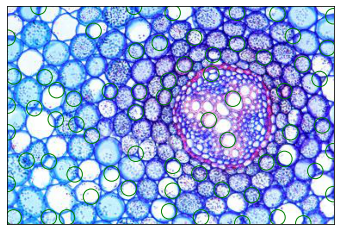

In [85]:
#Εφαρμογή της διαδικασίας για διαφορετικά σ από το 2 έως το 10
sigma = 3

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

<AxesSubplot:>

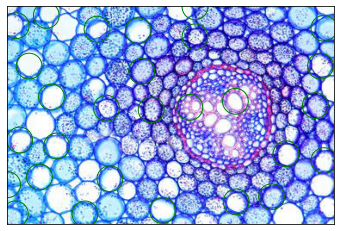

In [86]:
sigma = 5

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

<AxesSubplot:>

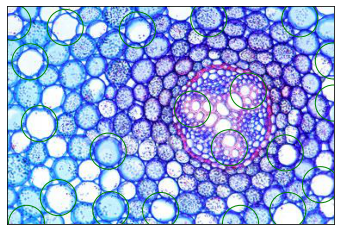

In [87]:
sigma = 7

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

<AxesSubplot:>

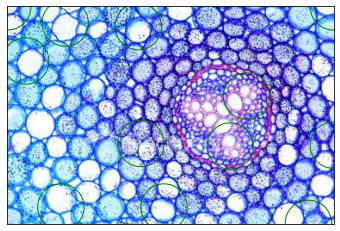

In [88]:
sigma = 9

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

In [89]:
img1 = cv.imread('donuts.jpg', cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img = cv.imread('donuts.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

<AxesSubplot:>

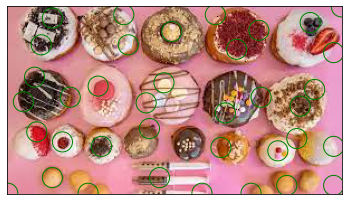

In [90]:
sigma = 3

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

<AxesSubplot:>

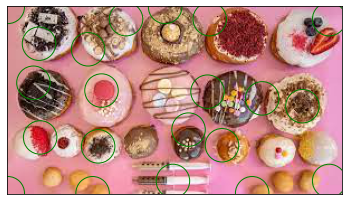

In [91]:
sigma = 5

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

<AxesSubplot:>

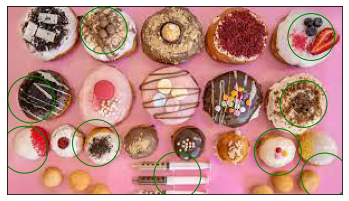

In [92]:
sigma = 7

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

<AxesSubplot:>

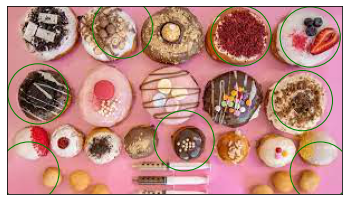

In [93]:
sigma = 9

Kp_Data = Blob_Detect_IntegImg(sigma, img, 0.005)
interest_points_visualization(img1, Kp_Data)

## 2.5.4

In [94]:
# Πολυκλιμακωτη Ανιχνευση Blobs με χρήση Integral Images
img1 = cv.imread('cells.jpg', cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img = cv.imread('cells.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

# Παρόμοια διαδικασία με τις υπόλοιπες πολυκλιμακωτές προσεγγίσεις
LoG = []

for i in range(N):
    _, log = filters_maker(diff_scale[i])
    LoG.append((diff_scale[i]**2) * cv.filter2D(img, -1, log))
    
print(LoG[0].shape)

(253, 380)


In [95]:
blob_points = []

sigmas = [3, 5, 7, 9]
for sigma in sigmas:
    blob_points.append(Blob_Detect_IntegImg(sigma, img, 0.003))

final_points = np.array([[1.,1.,1.]])

for j in range(N):
    for i in range(blob_points[j].shape[0]):
        if j==0:
            if LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j+1][int(blob_points[j][i,1]), int(blob_points[j][i,0])]:
                final_points = np.vstack([final_points, blob_points[j][i,:]])
        elif j==N-1:
            if LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j-1][int(blob_points[j][i,1]), int(blob_points[j][i,0])]:
                final_points = np.vstack([final_points, blob_points[j][i,:]])
        else:
            if LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j+1][int(blob_points[j][i,1]), int(blob_points[j][i,0])] and LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j-1][int(blob_points[j][i,1]), int(blob_points[j][i,0])]:
                final_points = np.vstack([final_points, blob_points[j][i,:]])
                
final_points = np.delete(final_points,0,0)

<AxesSubplot:>

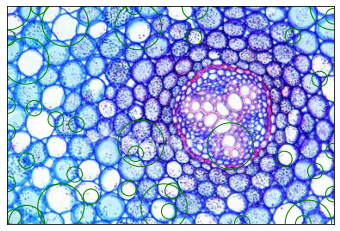

In [96]:
interest_points_visualization(img1, final_points)

In [97]:
# Εμφώλευση της διαδικασίας σε συνάρτηση
def Blob_Detect_IntegImg_Multiscale(img,sigma,s, theta_corn,N):
    diff_scale = [np.power(s,i)*sigma for i in range(0,N)]
    
    
    LoG = []

    for i in range(N):
        _, log = filters_maker(diff_scale[i])
        LoG.append((diff_scale[i]**2) * cv.filter2D(img, -1, log))
    blob_points = []

    sigmas = diff_scale
    for sigma in sigmas:
        blob_points.append(Blob_Detect_IntegImg(sigma, img, 0.003))

    final_points = np.array([[1.,1.,1.]])

    for j in range(N):
        for i in range(blob_points[j].shape[0]):
            if j==0:
                if LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j+1][int(blob_points[j][i,1]), int(blob_points[j][i,0])]:
                    final_points = np.vstack([final_points, blob_points[j][i,:]])
            elif j==N-1:
                if LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j-1][int(blob_points[j][i,1]), int(blob_points[j][i,0])]:
                    final_points = np.vstack([final_points, blob_points[j][i,:]])
            else:
                if LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j+1][int(blob_points[j][i,1]), int(blob_points[j][i,0])] and LoG[j][int(blob_points[j][i,1]), int(blob_points[j][i,0])] > LoG[j-1][int(blob_points[j][i,1]), int(blob_points[j][i,0])]:
                    final_points = np.vstack([final_points, blob_points[j][i,:]])

    final_points = np.delete(final_points,0,0)
    return final_points

<AxesSubplot:>

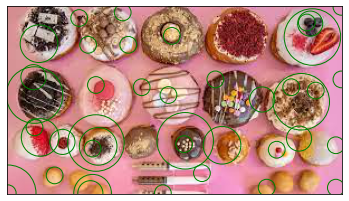

In [185]:
# Εφαρμογή της συνάρτησης
img1 = cv.imread('donuts.jpg', cv.IMREAD_COLOR)
img1 = cv.cvtColor(img1, cv.COLOR_BGR2RGB)

img = cv.imread('donuts.jpg', cv.IMREAD_GRAYSCALE)
img = img.astype(float)/255

sigma=2.5
r=2.5
k=0.05
theta_corn=0.002
s=1.5
N=4

final_points = Blob_Detect_IntegImg_Multiscale(img,sigma,s, theta_corn,N)
interest_points_visualization(img1, final_points)

# Μέρος 3

## Μέρος 3.1

In [186]:
import cv22_lab1_part3_utils as p3

In [226]:
detect_fun_Cor = lambda I : Corner_Detect(I, 2, 2.5, 0.005)

In [227]:
detect_fun_CorM = lambda I : Corner_Detect_Multiscale(I, 2, 2.5,1.5, 0.005,4)

In [228]:
detect_fun_Blob = lambda I : Blob_Detect(I,2,2.5,0.005)

In [229]:
detect_fun_BlobM = lambda I : Blob_Detect_Multiscale(I,2,1.5,2.5,0.005,4)

In [230]:
detect_fun_BlobIntegM  = lambda I: Blob_Detect_IntegImg_Multiscale(I,2,2.5, 0.005,4)

In [231]:
desc_fun_surf = lambda I, kp: p3.featuresSURF(I,kp)

In [232]:
desc_fun_hog = lambda I, kp: p3.featuresHOG(I,kp)

In [233]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_Cor, desc_fun_surf)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.003
Avg. Theta Error for Image 1: 1.968
Avg. Scale Error for Image 2: 0.002
Avg. Theta Error for Image 2: 0.318
Avg. Scale Error for Image 3: 0.097
Avg. Theta Error for Image 3: 12.909


In [234]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_CorM, desc_fun_surf)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.002
Avg. Theta Error for Image 1: 0.102
Avg. Scale Error for Image 2: 0.003
Avg. Theta Error for Image 2: 0.239
Avg. Scale Error for Image 3: 0.002
Avg. Theta Error for Image 3: 0.138


In [235]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_Blob, desc_fun_surf)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.027
Avg. Theta Error for Image 1: 7.759
Avg. Scale Error for Image 2: 0.010
Avg. Theta Error for Image 2: 0.229
Avg. Scale Error for Image 3: 0.001
Avg. Theta Error for Image 3: 0.054


In [236]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_BlobM, desc_fun_surf)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.001
Avg. Theta Error for Image 1: 0.073
Avg. Scale Error for Image 2: 0.001
Avg. Theta Error for Image 2: 0.064
Avg. Scale Error for Image 3: 0.001
Avg. Theta Error for Image 3: 0.070


In [237]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_BlobIntegM, desc_fun_surf)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.059
Avg. Theta Error for Image 1: 6.954
Avg. Scale Error for Image 2: 0.043
Avg. Theta Error for Image 2: 4.813
Avg. Scale Error for Image 3: 0.189
Avg. Theta Error for Image 3: 17.993


In [238]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_Cor, desc_fun_hog)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.186
Avg. Theta Error for Image 1: 22.619
Avg. Scale Error for Image 2: 0.351
Avg. Theta Error for Image 2: 19.199
Avg. Scale Error for Image 3: 0.285
Avg. Theta Error for Image 3: 23.699


In [239]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_CorM, desc_fun_hog)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.143
Avg. Theta Error for Image 1: 18.012
Avg. Scale Error for Image 2: 0.539
Avg. Theta Error for Image 2: 19.554
Avg. Scale Error for Image 3: 0.609
Avg. Theta Error for Image 3: 16.641


In [240]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_Blob, desc_fun_hog)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.186
Avg. Theta Error for Image 1: 7.231
Avg. Scale Error for Image 2: 0.100
Avg. Theta Error for Image 2: 13.674
Avg. Scale Error for Image 3: 0.154
Avg. Theta Error for Image 3: 27.219


In [241]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_BlobM, desc_fun_hog)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.256
Avg. Theta Error for Image 1: 16.226
Avg. Scale Error for Image 2: 0.134
Avg. Theta Error for Image 2: 13.866
Avg. Scale Error for Image 3: 0.348
Avg. Theta Error for Image 3: 17.463


In [242]:
avg_scale_errors, avg_theta_errors = p3.matching_evaluation(detect_fun_BlobIntegM, desc_fun_hog)
print('Avg. Scale Error for Image 1: {:.3f}'.format(avg_scale_errors[0]))
print('Avg. Theta Error for Image 1: {:.3f}'.format(avg_theta_errors[0]))
print('Avg. Scale Error for Image 2: {:.3f}'.format(avg_scale_errors[1]))
print('Avg. Theta Error for Image 2: {:.3f}'.format(avg_theta_errors[1]))
print('Avg. Scale Error for Image 3: {:.3f}'.format(avg_scale_errors[2]))
print('Avg. Theta Error for Image 3: {:.3f}'.format(avg_theta_errors[2]))

Avg. Scale Error for Image 1: 0.176
Avg. Theta Error for Image 1: 27.268
Avg. Scale Error for Image 2: 0.136
Avg. Theta Error for Image 2: 22.343
Avg. Scale Error for Image 3: 0.207
Avg. Theta Error for Image 3: 29.556


## Μέρος 3.2

In [245]:
feats_CorM_hog = p3.FeatureExtraction(detect_fun_CorM, desc_fun_hog)
feats_BlobM_hog = p3.FeatureExtraction(detect_fun_BlobM, desc_fun_hog)
feats_BlobIntegM_hog = p3.FeatureExtraction(detect_fun_BlobIntegM, desc_fun_hog)
feats_CorM_surf = p3.FeatureExtraction(detect_fun_CorM, desc_fun_surf)
feats_BlobM_surf = p3.FeatureExtraction(detect_fun_BlobM, desc_fun_surf)
feats_BlobIntegM_surf = p3.FeatureExtraction(detect_fun_BlobIntegM, desc_fun_surf)

Time for feature extraction: 150.224
Time for feature extraction: 130.853
Time for feature extraction: 1194.322
Time for feature extraction: 135.308
Time for feature extraction: 102.367
Time for feature extraction: 1174.777


In [247]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_CorM_surf, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = p3.BagOfWords(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Corner Detection with SURF descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Corner Detection with SURF descriptors: 59.172%


In [248]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobM_surf, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = p3.BagOfWords(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with SURF descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with SURF descriptors: 58.621%


In [249]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobIntegM_surf, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = p3.BagOfWords(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with Integral Image with SURF descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with Integral Image with SURF descriptors: 55.172%


In [250]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_CorM_hog, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = p3.BagOfWords(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Corner Detection with HOG descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Corner Detection with HOG descriptors: 62.069%


In [251]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobM_hog, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = p3.BagOfWords(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with HOG descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with HOG descriptors: 64.000%


In [339]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobIntegM_hog, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = p3.BagOfWords(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with Integral Image with HOG descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with Integral Image with HOG descriptors: 61.241%


### Προαιρετικό Μέρος

In [280]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

KMeans(n_clusters=1000)

In [335]:
def Custom_BOVW(data_train,data_test):
    #Συνένωση Περιγραφητών, διατήρηση του 50% του train set και ορισμός κέντρων
    train = np.vstack(data_train)
    test = np.vstack(data_test)
    train = train[:train.shape[0]//2]
    centers = 1000
    
    #Εκπαίδευση Kmeans
    classifier = KMeans(n_clusters = centers)
    classifier.fit(train)
    
    kmeans_centers = classifier.cluster_centers_
    train_array = np.empty(shape = (0,1000))
    test_array = np.empty(shape = (0,1000))
    
    #Εύρεση κοντινότερων κέντρων για κάθε feature στα set και δημιουργία ιστογραμμάτων
    for i in data_train:
        a = sp.spatial.distance.cdist(i,kmeans_centers)
        b = np.argmin(a , axis = 1)
        c = np.bincount(b, minlength = 1000)
        norm = np.linalg.norm(c)
        hist = c/norm
        train_array = np.vstack([train_array, hist])

    for i in data_test:
        a = sp.spatial.distance.cdist(i,kmeans_centers)
        b = np.argmin(a , axis = 1)
        c = np.bincount(b, minlength = 1000)
        norm = np.linalg.norm(c)
        hist = c/norm
        test_array = np.vstack([test_array, hist])
            
    return train_array, test_array 

In [340]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_CorM_surf, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = Custom_BOVW(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Corner Detection with SURF descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Corner Detection with SURF descriptors: 59.034%


In [341]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobM_surf, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = Custom_BOVW(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with SURF descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with SURF descriptors: 59.034%


In [342]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobIntegM_surf, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = Custom_BOVW(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with Integral Image with SURF descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with Integral Image with SURF descriptors: 53.379%


In [343]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_CorM_hog, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = Custom_BOVW(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Corner Detection with HOG descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Corner Detection with HOG descriptors: 63.586%


In [344]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobM_hog, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = Custom_BOVW(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with HOG descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with HOG descriptors: 65.793%


In [345]:
accs = []
for k in range(5):
    # Split into a training set and a test set.
    data_train, label_train, data_test, label_test = p3.createTrainTest(feats_BlobIntegM_hog, k)

    # Perform Kmeans to find centroids for clusters.
    BOF_tr, BOF_ts = Custom_BOVW(data_train, data_test)

    # Train an svm on the training set and make predictions on the test set
    acc, preds, probas = p3.svm(BOF_tr, label_train, BOF_ts, label_test)
    accs.append(acc)

print('Mean accuracy for Blob Detection with Integral Image with HOG descriptors: {:.3f}%'.format(100.0*np.mean(accs)))

Mean accuracy for Blob Detection with Integral Image with HOG descriptors: 59.724%
